In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

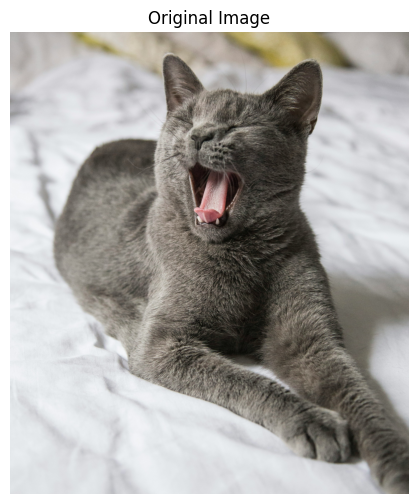

In [4]:
# Load the image
img = plt.imread('cat.jpg')

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()


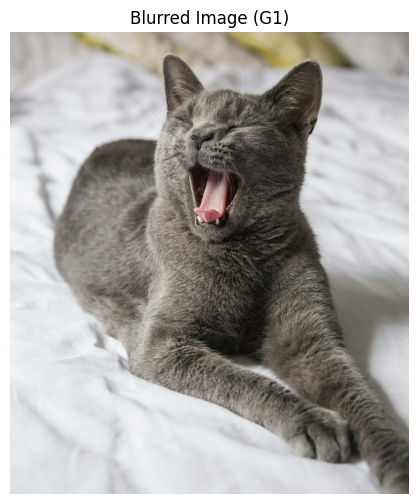

In [5]:
# Mean Filter (G1)
kernel_size = 3
G1 = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

blurred_img = cv2.filter2D(img, -1, G1)


plt.figure(figsize=(8, 6))
plt.imshow(blurred_img)
plt.title('Blurred Image (G1)')
plt.axis('off')
plt.show()

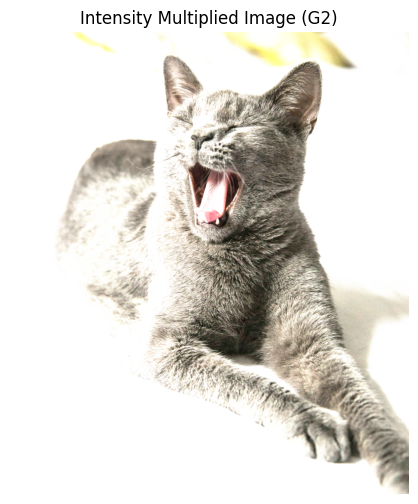

In [6]:
# G2: Multiply image intensities by 2
G2 = 2 * np.eye(1)


intensity_multiplied_img = cv2.filter2D(img, -1, G2)

plt.figure(figsize=(8, 6))
plt.imshow(intensity_multiplied_img)
plt.title('Intensity Multiplied Image (G2)')
plt.axis('off')
plt.show()

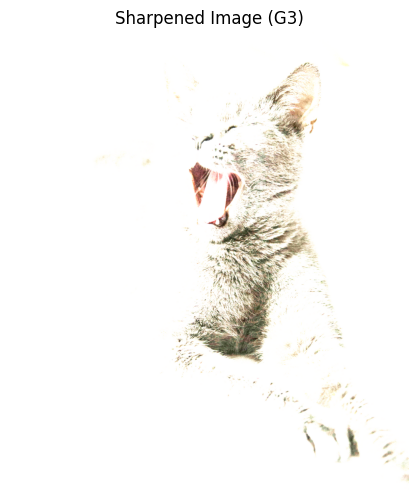

In [7]:
# G3: Sharpening filter (defined in terms of G1 and G2)
G3 = 2 * np.eye(3) - G1
sharpened_img = cv2.filter2D(img, -1, G3)

plt.figure(figsize=(8, 6))
plt.imshow(sharpened_img)
plt.title('Sharpened Image (G3)')
plt.axis('off')
plt.show()

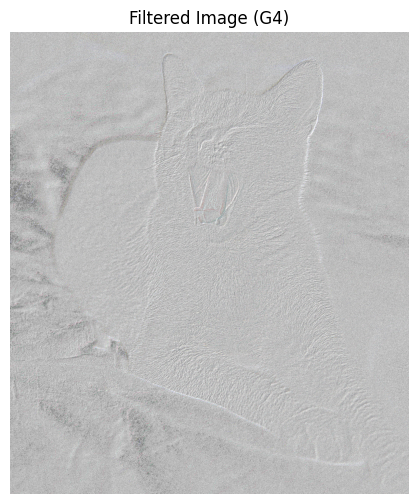

In [8]:
# G4: The filter that requires adjustment
G4 = np.array([[-1, -1, 0], [-1, 3, 0], [0, 0, 0]], dtype=np.float32)
filtered_img_G4 = cv2.filter2D(img, -1, G4) + 0.5 # Add 0.5 to bring values into visible range


plt.figure(figsize=(8, 6))
plt.imshow(filtered_img_G4)
plt.title('Filtered Image (G4)')
plt.axis('off')
plt.show()

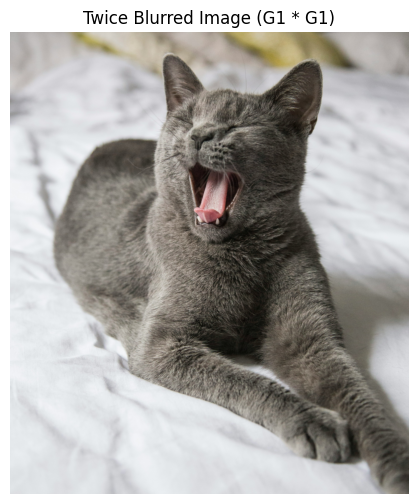

In [9]:
# Twice Blurred Image (G1 * G1)
twice_blurred_img = cv2.filter2D(blurred_img, -1, G1)

plt.figure(figsize=(8, 6))
plt.imshow(twice_blurred_img)
plt.title('Twice Blurred Image (G1 * G1)')
plt.axis('off')
plt.show()

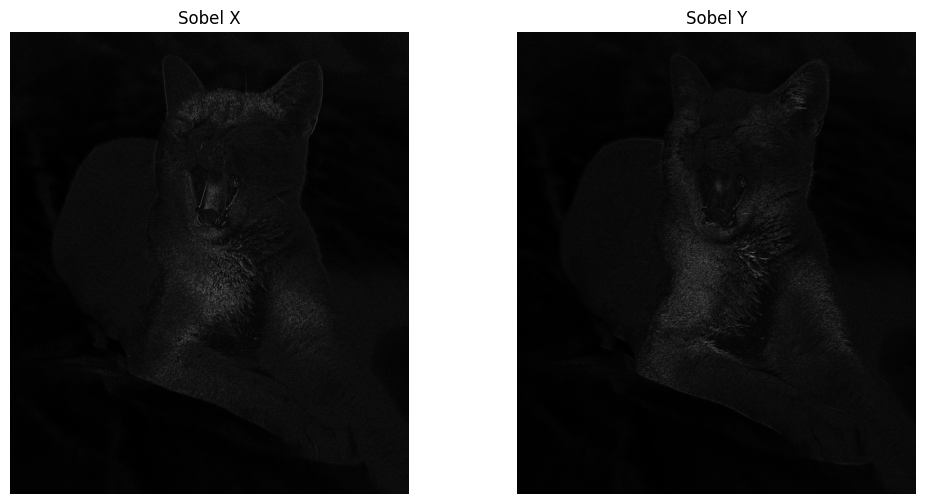

In [10]:
# Sobel filters
gray_img = cv2.cvtColor(img.astype(np.uint8) * 255, cv2.COLOR_RGB2GRAY).astype(np.float32) / 255  # Convert to grayscale if needed

sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(sobely), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.show()

## Purpose of Applying these Techniques:

### Blurring (G1, G1*G1):
Used for noise reduction, smoothing images, and as a pre-processing step for other operations. Twice blurring increases the blur effect.
### Intensity Adjustment (G2):
 Used to correct under- or over-exposed images, or for artistic effects.
### Sharpening (G3):
 Enhances details and makes images appear crisper, especially useful for images that are slightly blurry.
### Edge Detection (Sobel):
 Important for feature extraction, object recognition, and image segmentation.